In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils

In [2]:
%ls -R spectra/

spectra/:
ardata.fits  HD110379/  HD186791/  X0319/  X0386/  X0538/  X0771/

spectra/HD110379:
BG20000                             tellstar_qvir_ordens_finalglue.fits
obs_HD110379_ordens_finalglue.fits

spectra/HD186791:
BG20000                             tellstar_35aql_ordens_finalglue.fits
obs_HD186791_ordens_finalglue.fits

spectra/X0319:
X0319_N_O_E.fits            X0319_U_O_E.fits      X0319_V_O_E.fits
X0319_N_O_E_TAC_final.fits  X0319_U_O_E_TAC.fits  X0319_V_O_E_TAC_final.fits
X0319_N_O_E_TRA.fits        X0319_U_O_E_TRA.fits  X0319_V_O_E_TRA.fits

spectra/X0386:
X0386_N_N_E.fits            X0386_U_N_E.fits      X0386_V_N_E.fits
X0386_N_N_E_TAC_final.fits  X0386_U_N_E_TAC.fits  X0386_V_N_E_TAC_final.fits
X0386_N_N_E_TRA.fits        X0386_U_N_E_TRA.fits  X0386_V_N_E_TRA.fits

spectra/X0538:
X0538_N_N_E.fits            X0538_U_N_E.fits      X0538_V_N_E.fits
X0538_N_N_E_TAC_final.fits  X0538_U_N_E_TAC.fits  X0538_V_N_E_TAC_final.fits
X0538_N_N_E_TRA.fits        X0538_U_N_E_TRA.fits 

### X0319

In [3]:
X0319_obs_flux, X0319_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E.fits')
X0319_tel_flux, X0319_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E_TRA.fits')
X0319_corr_flux, X0319_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0319/X0319_V_O_E_TAC_final.fits')

In [8]:
X0319_gt_atm = X0319_obs_flux / X0319_corr_flux

In [11]:
all(X0319_gt_atm == X0319_tel_flux)

False

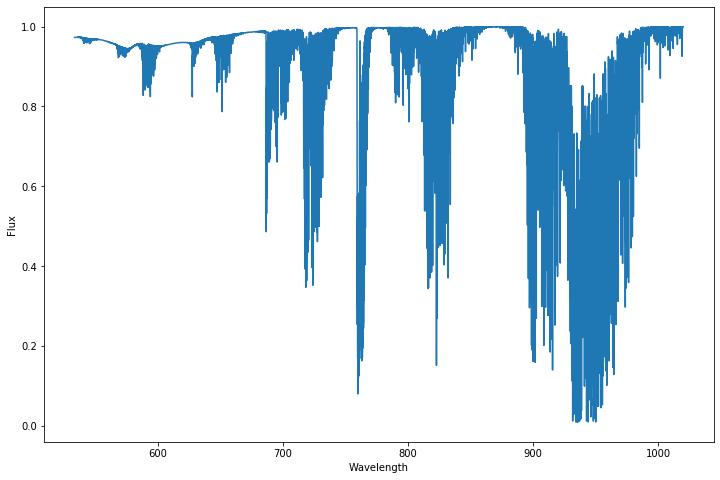

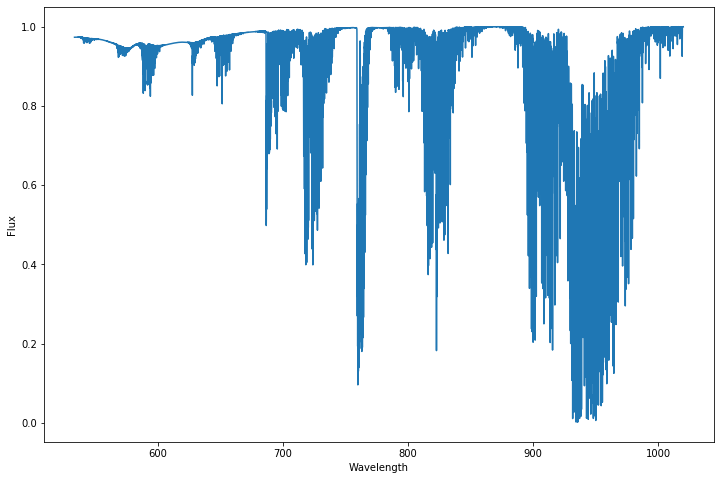

In [10]:
utils.plot_spectrum(X0319_gt_atm, X0319_tel_wl)
utils.plot_spectrum(X0319_tel_flux, X0319_tel_wl)

Formato dos dois espectros atm e atm' são extremamente parecidos. Parece ser um bom caminho,

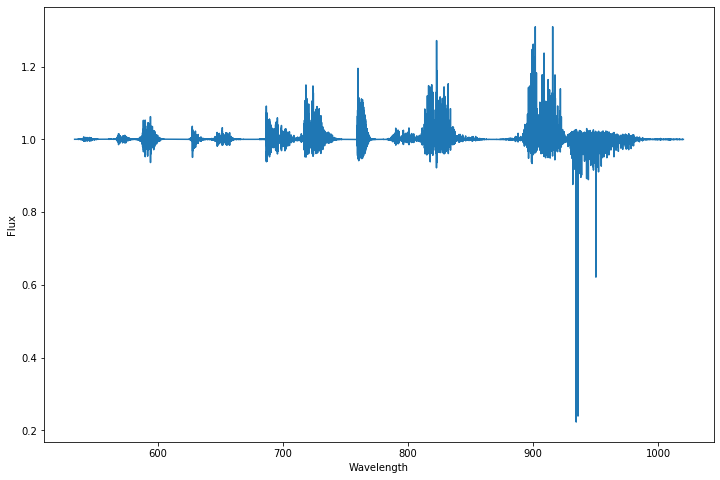

In [28]:
X0319_atm_div = X0319_tel_flux / X0319_gt_atm
utils.plot_spectrum(X0319_atm_div, X0319_tel_wl)

### X0386

In [12]:
X0386_obs_flux, X0386_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0386/X0386_V_N_E.fits')
X0386_tel_flux, X0386_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0386/X0386_V_N_E_TRA.fits')
X0386_corr_flux, X0386_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0386/X0386_V_N_E_TAC_final.fits')

In [15]:
X0386_gt_atm = X0386_obs_flux / X0386_corr_flux
all(X0386_gt_atm == X0386_tel_flux)

False

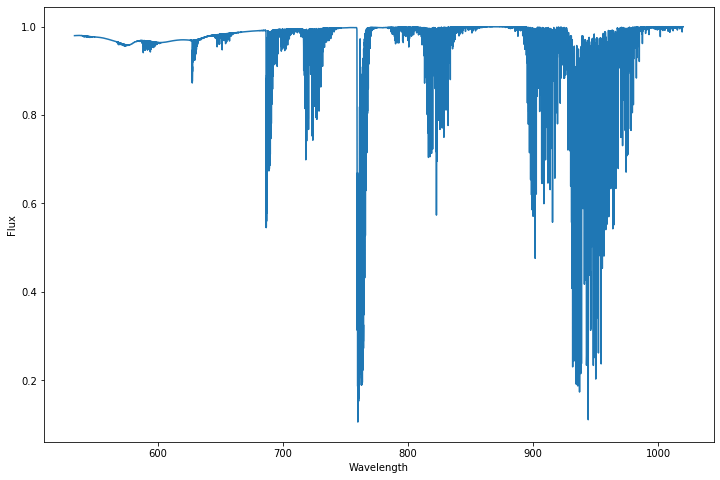

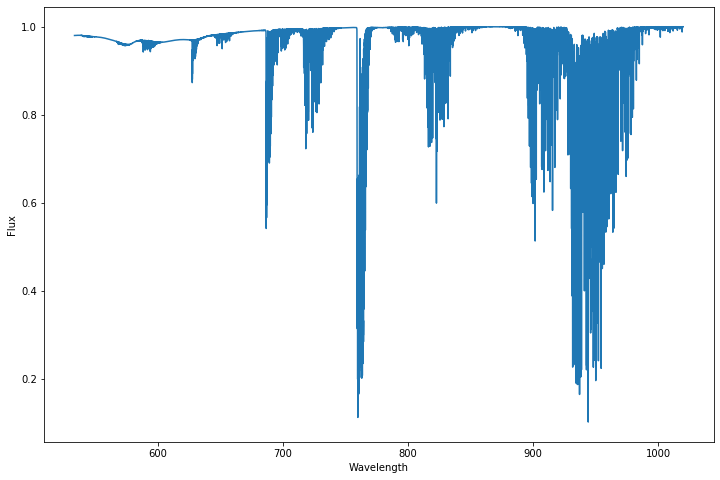

In [14]:
utils.plot_spectrum(X0386_gt_atm, X0386_tel_wl)
utils.plot_spectrum(X0386_tel_flux, X0386_tel_wl)

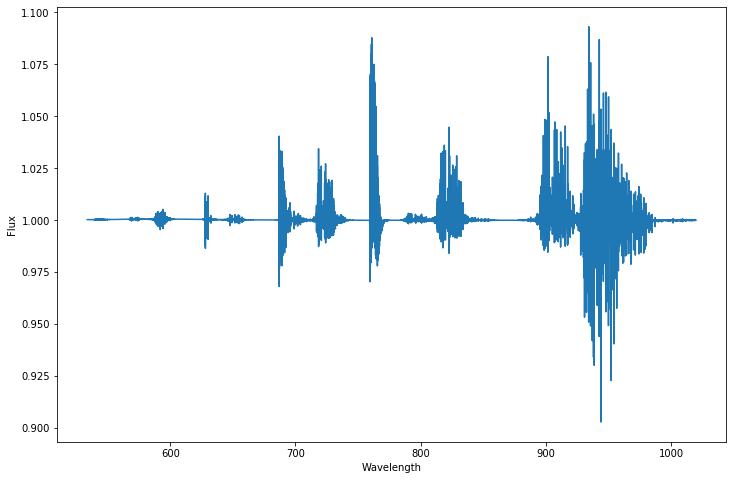

In [29]:
X0386_atm_div = X0386_tel_flux / X0386_gt_atm
utils.plot_spectrum(X0386_atm_div, X0386_tel_wl)

### X0538

In [16]:
X0538_obs_flux, X0538_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0538/X0538_V_N_E.fits')
X0538_tel_flux, X0538_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0538/X0538_V_N_E_TRA.fits')
X0538_corr_flux, X0538_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0538/X0538_V_N_E_TAC_final.fits')

In [17]:
X0538_gt_atm = X0538_obs_flux / X0538_corr_flux
all(X0538_gt_atm == X0538_tel_flux)

False

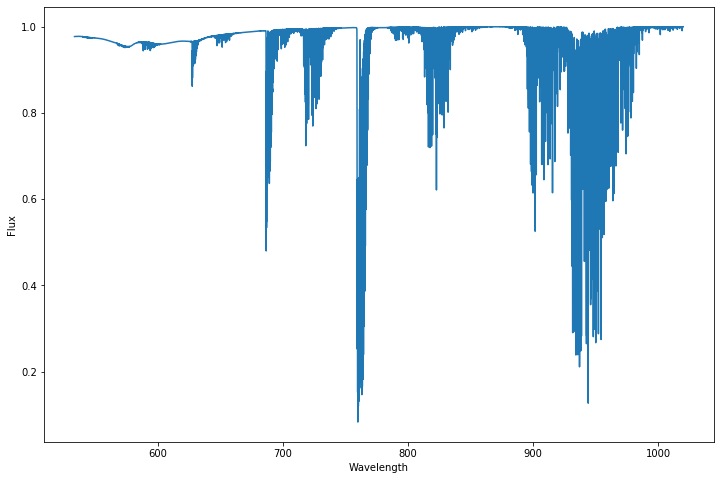

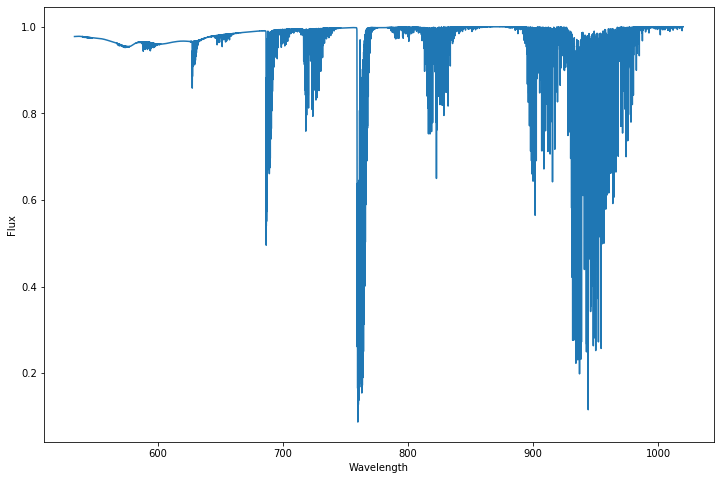

In [18]:
utils.plot_spectrum(X0538_gt_atm, X0538_tel_wl)
utils.plot_spectrum(X0538_tel_flux, X0538_tel_wl)

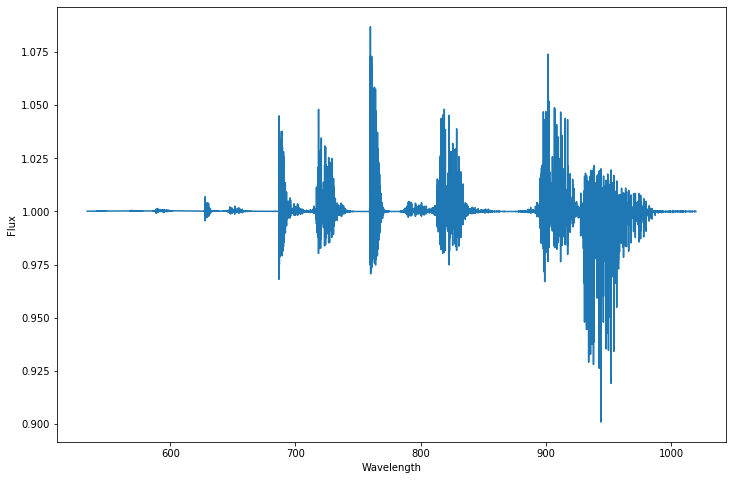

In [30]:
X0538_atm_div = X0538_tel_flux / X0538_gt_atm
utils.plot_spectrum(X0538_atm_div, X0538_tel_wl)

### X0771

In [20]:
X0771_obs_flux, X0771_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0771/X0771_V_N_E.fits')
X0771_tel_flux, X0771_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0771/X0771_V_N_E_TRA.fits')
X0771_corr_flux, X0771_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0771/X0771_V_N_E_TAC_final.fits')

In [21]:
X0771_gt_atm = X0771_obs_flux / X0771_corr_flux
all(X0771_gt_atm == X0771_tel_flux)

False

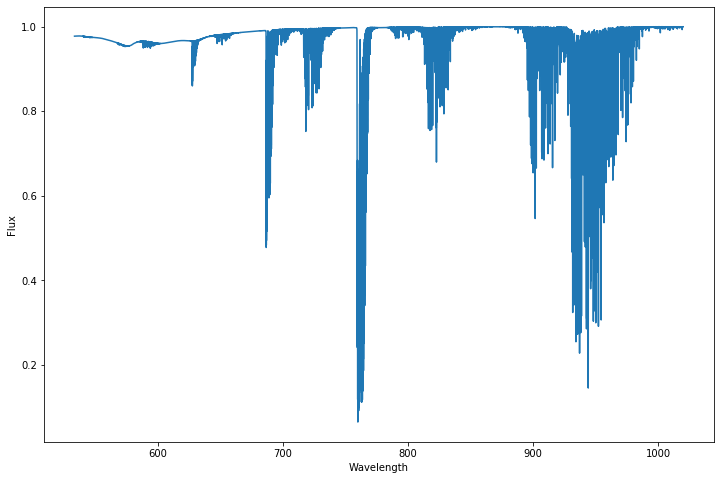

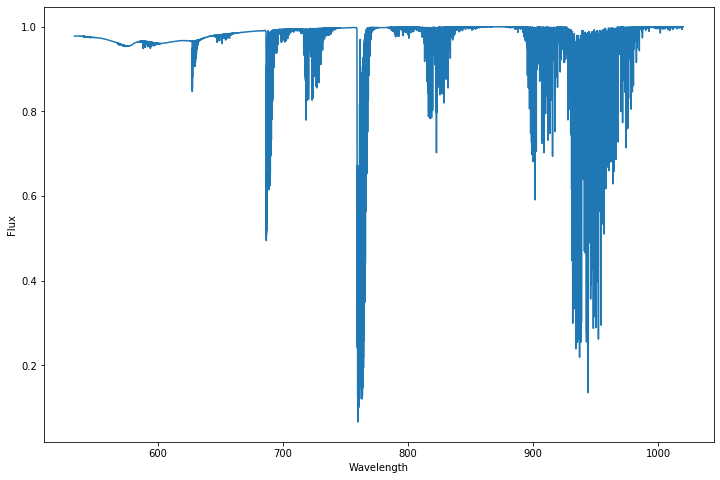

In [22]:
utils.plot_spectrum(X0771_gt_atm, X0771_tel_wl)
utils.plot_spectrum(X0771_tel_flux, X0771_tel_wl)

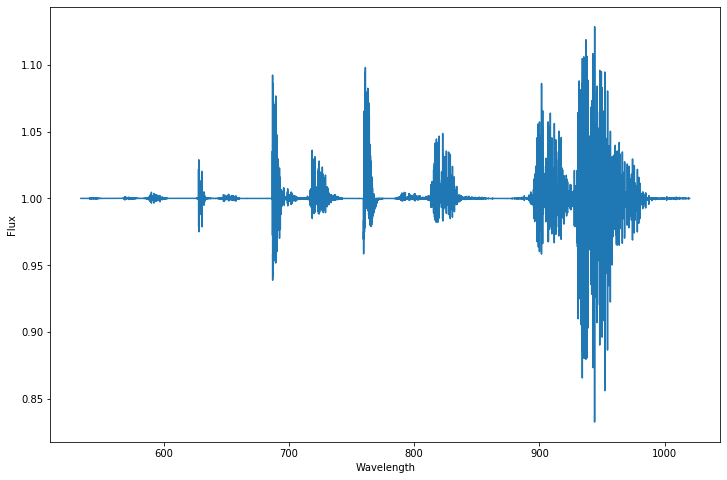

In [31]:
X0771_atm_div = X0771_tel_flux / X0771_gt_atm
utils.plot_spectrum(X0771_atm_div, X0771_tel_wl)